In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

import re
import string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [134]:
STOPWORDS = set(stopwords.words("english"))

def clean_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"https?://\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = [w for w in text.split() if w not in STOPWORDS]
    return " ".join(tokens)

df = pd.read_csv("data/IMDB Dataset.csv")
df.head()

tfidf = TfidfVectorizer(
    stop_words='english',       
    tokenizer=token.tokenize,  
    max_features=5000           
)

In [135]:
df['review'].iloc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [136]:
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [137]:
df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,label,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter matteis love time money visually stunni...


In [138]:
df['cleaned_review'].iloc[1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   label           50000 non-null  int64 
 3   cleaned_review  50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [140]:
df.shape

(50000, 4)

In [141]:
df = df.drop_duplicates()

In [142]:
df.shape

(49582, 4)

In [143]:
df = df[['cleaned_review','label']]

In [144]:
df

,cleaned_review,label
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


In [145]:
df['label'].value_counts() 


label
1    24884
0    24698
Name: count, dtype: int64

In [146]:
tokenized = df['cleaned_review'].apply(lambda x: x.split())
tokenized.head()


0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: cleaned_review, dtype: object

In [147]:
tokenized.iloc[1]

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'masters',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwells',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

In [148]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
text_tfidf = tfidf.fit_transform(df['cleaned_review'])

/home/ana/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [149]:
X = text_tfidf
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes accuracy: 84.97%

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4939
           1       0.85      0.86      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



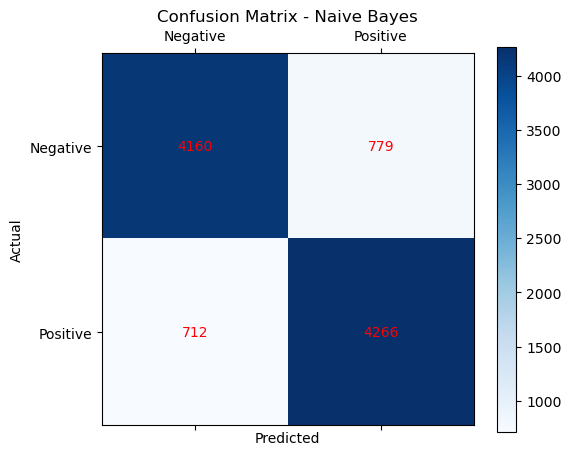

In [150]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)  
predictions = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes accuracy:", "{:04.2f}".format(accuracy * 100) + "%\n")

print("Classification Report:\n")
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(6,5))
cax = ax.matshow(cm, cmap=plt.cm.Blues)  
plt.title('Confusion Matrix - Naive Bayes')
fig.colorbar(cax)

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i,j]), va='center', ha='center', color='red')

plt.show()

